In [1]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Pull the pricing data of TSLA, S&P 500 & QQQ
start = '2019-1-01'
end = '2020-12-04'
SPY = web.DataReader('SPY', 'yahoo', start=start, end=end).Close.dropna()
QQQ = web.DataReader('QQQ', 'yahoo', start=start, end=end).Close.dropna()
TSLA = web.DataReader('TSLA','yahoo', start=start, end=end).Close.dropna()

In [3]:
# Correlation coefficients
np.corrcoef(TSLA,SPY)[0,1],np.corrcoef(TSLA,QQQ)[0,1], np.corrcoef(QQQ,SPY)[0,1]

(0.760206783155591, 0.9462613816182546, 0.8766704035662096)

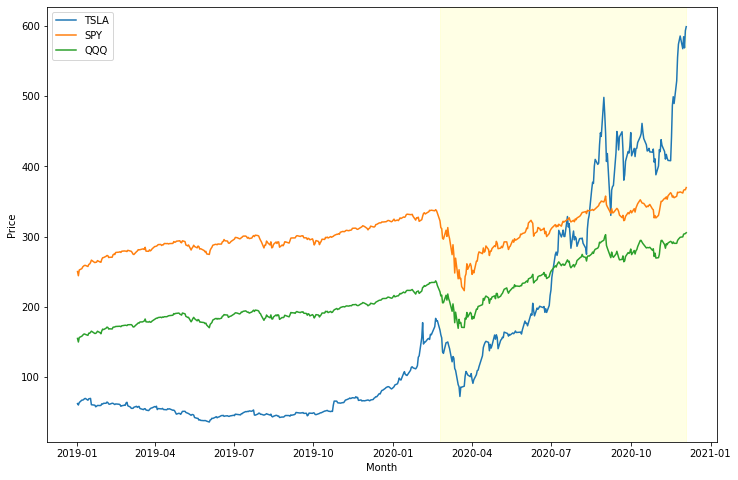

In [4]:
from matplotlib.dates import DateFormatter

plt.figure(figsize=(12,8))
plt.plot(TSLA.index,TSLA.values)
plt.plot(SPY.index, SPY.values)
plt.plot(QQQ.index, QQQ.values)
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend(['TSLA', 'SPY', 'QQQ'])
#plt.axvline(pd.to_datetime('2019-11-01'), color='r', linestyle='--', lw=2)
plt.axvspan(xmin= pd.to_datetime('2020-02-24'),xmax =  pd.to_datetime('2020-12-04'), alpha = 0.1, color = 'yellow' )

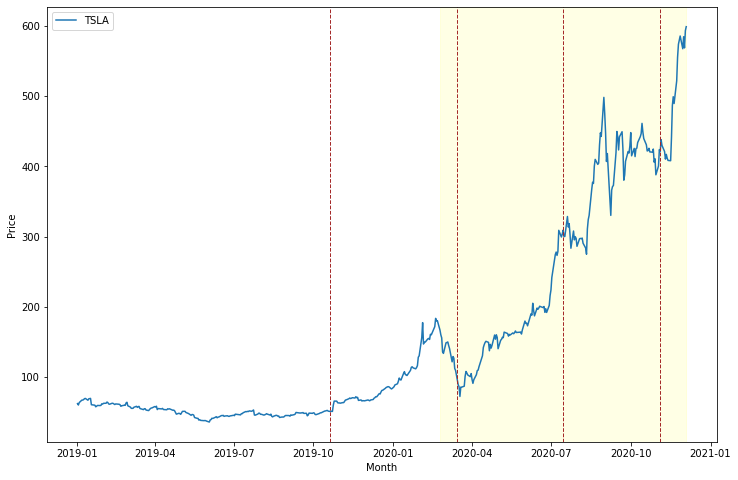

In [5]:
plt.figure(figsize=(12,8))
plt.plot(TSLA.index,TSLA.values)
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend(['TSLA'])
plt.axvspan(xmin= pd.to_datetime('2020-02-24'),xmax =  pd.to_datetime('2020-12-04'), alpha = 0.1, color = 'yellow' )
plt.axvline(pd.to_datetime('2019-10-20'), color='brown', linestyle='--', lw=1)
plt.axvline(pd.to_datetime('2020-03-15'), color='brown', linestyle='--', lw=1)
plt.axvline(pd.to_datetime('2020-07-15'), color='brown', linestyle='--', lw=1)
plt.axvline(pd.to_datetime('2020-11-4'), color='brown', linestyle='--', lw=1);


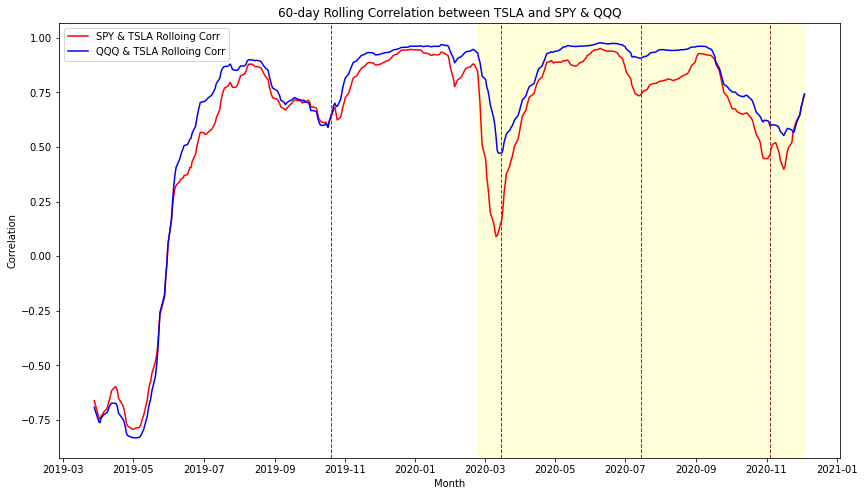

In [6]:
plt.figure(figsize=(14,8))
rolling_correlation1 = TSLA.rolling(window=60).corr(other= SPY)
rolling_correlation2 = TSLA.rolling(window=60).corr(other= QQQ)
plt.plot(rolling_correlation1, color = "Red")
plt.plot(rolling_correlation2, color = "blue")
plt.xlabel('Month')
plt.ylabel('Correlation')
plt.legend(['SPY & TSLA Rolloing Corr', 'QQQ & TSLA Rolloing Corr'])
plt.title('60-day Rolling Correlation between TSLA and SPY & QQQ')
plt.axvspan(xmin= pd.to_datetime('2020-02-24'),xmax =  pd.to_datetime('2020-12-04'), alpha = 0.15, color = 'yellow' )
plt.axvline(pd.to_datetime('2019-10-20'), color='brown', linestyle='--', lw=1)
plt.axvline(pd.to_datetime('2020-03-15'), color='brown', linestyle='--', lw=1)
plt.axvline(pd.to_datetime('2020-07-15'), color='brown', linestyle='--', lw=1)
plt.axvline(pd.to_datetime('2020-11-4'), color='brown', linestyle='--', lw=1);

## How TSLA varies as a function of how SPY and QQQ varies

In [7]:
def linreg(X,Y):
    # Running the linear regression
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]

    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.figure(figsize=(10,8))
    plt.scatter(X, Y, alpha=0.3) # Plot the raw data
    plt.plot(X2,Y_hat, 'r', alpha=0.9);  # Add the regression line, colored in red
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    return model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     124.1
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           8.15e-26
Time:                        04:58:39   Log-Likelihood:                 865.12
No. Observations:                 486   AIC:                            -1726.
Df Residuals:                     484   BIC:                            -1718.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0045      0.002      2.438      0.015       0.001       0.008
x1             1.2757      0.115     11.140      0.000       1.051       1.501
==============================================================================
Omnibus:                       59.485   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              408.087
Skew:                           0.207   Prob(JB):                     2.43e-89
Kurtosis:                       7.470   Cond. No.                         61.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

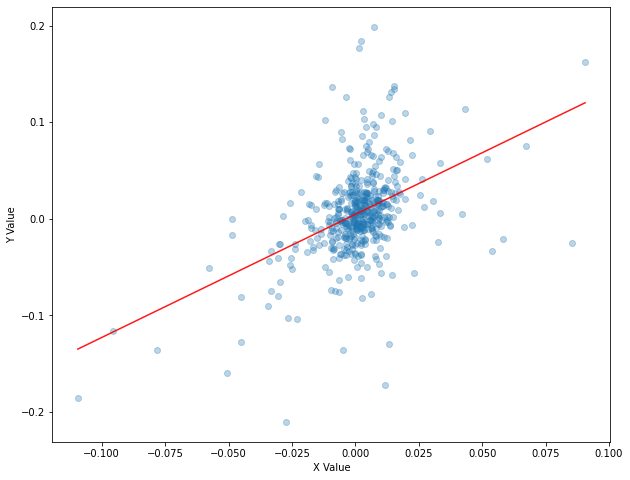

In [8]:
# We have to take the percent changes to get to returns
# Get rid of the first (0th) element because it is NAN
# SPY
TSLA_r = TSLA.pct_change()[1:]
SPY_r = SPY.pct_change()[1:]

linreg(SPY_r.values, TSLA_r.values)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     188.8
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           1.64e-36
Time:                        04:58:40   Log-Likelihood:                 889.69
No. Observations:                 486   AIC:                            -1775.
Df Residuals:                     484   BIC:                            -1767.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0036      0.002      2.030      0.043       0.000       0.007
x1             1.3693      0.100     13.741      0.000       1.174       1.565
==============================================================================
Omnibus:                       56.098   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              399.834
Skew:                           0.070   Prob(JB):                     1.50e-87
Kurtosis:                       7.441   Cond. No.                         56.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

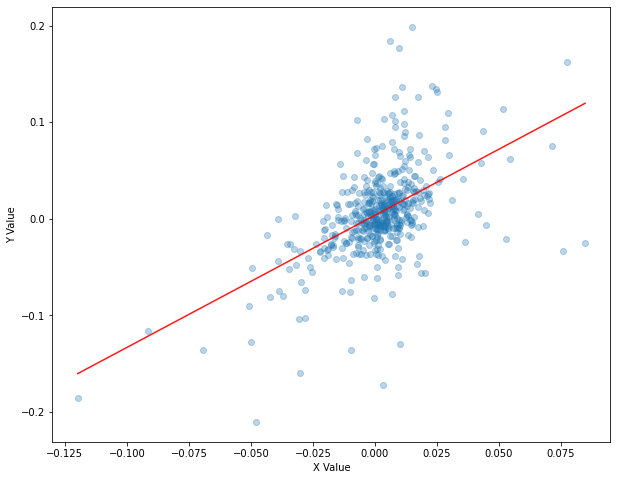

In [9]:
# QQQ
TSLA_r = TSLA.pct_change()[1:]
QQQ_r = QQQ.pct_change()[1:]

linreg(QQQ_r.values, TSLA_r.values)

In [10]:
def linreg(X,Y):
    # Running the linear regression
    x = sm.add_constant(X) # Add a row of 1's so that our model has a constant term
    model = regression.linear_model.OLS(Y, x).fit()
    return model.params[0], model.params[1] # Return the coefficients of the linear model

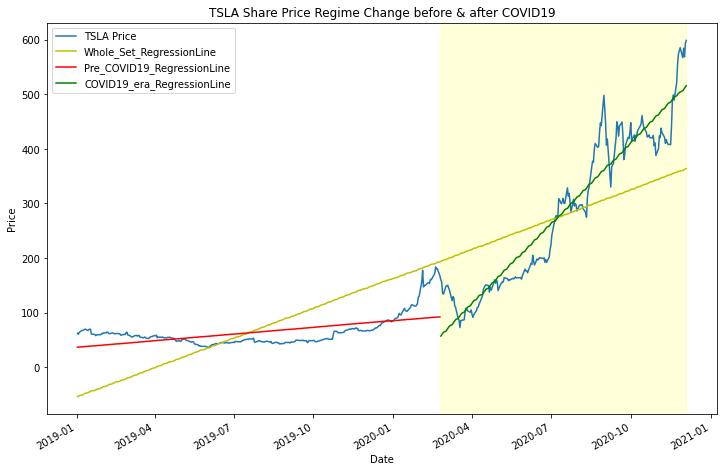

In [11]:
# Manually set the point where we think a structural break occurs
breakpoint = 288
xs = np.arange(len(TSLA))
xs2 = np.arange(breakpoint)
xs3 = np.arange(len(TSLA) - breakpoint)

# Perform linear regressions on the full data set, the data up to the breakpoint, and the data after
a, b = linreg(xs, TSLA)
a2, b2 = linreg(xs2, TSLA[:breakpoint])
a3, b3 = linreg(xs3, TSLA[breakpoint:])

Y_hat = pd.Series(xs * b + a, index=TSLA.index)
Y_hat2 = pd.Series(xs2 * b2 + a2, index=TSLA.index[:breakpoint])
Y_hat3 = pd.Series(xs3 * b3 + a3, index=TSLA.index[breakpoint:])

# Plot the raw data
plt.figure(figsize=(12,8))
TSLA.plot()
Y_hat.plot(color='y')
Y_hat2.plot(color='r')
Y_hat3.plot(color='g')
plt.title('TSLA Share Price Regime Change before & after COVID19')
plt.ylabel('Price')
plt.legend(['TSLA Price', 'Whole_Set_RegressionLine', 'Pre_COVID19_RegressionLine','COVID19_era_RegressionLine'])
plt.axvspan(xmin= pd.to_datetime('2020-02-24'),xmax =  pd.to_datetime('2020-12-04'), alpha = 0.15, color = 'yellow' );